In [4]:
!unzip -q /content/drive/MyDrive/dubna_hack/weather-forecast-hackathon.zip

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import tqdm
dict_weather = {
    "longitude": [],
    "latitude": [],
    "hour": [],
    "cloud_cover": [],
    "elevation": [],
    "humidity": [],
    "pressure": [],
    "temperature": [],
    "wind_dir": [],
    "wind_speed": [],
}
for hour in tqdm.tqdm(range(43)):
  for y in range(30):
    for x in range(30):
      dict_weather["longitude"].append(x)
      dict_weather["latitude"].append(y)
      dict_weather["hour"].append(hour)

      dict_weather["cloud_cover"].append(np.load("data/cloud_cover.npy")[hour][y][x])
      dict_weather["elevation"].append(np.load("data/elevation.npy")[y][x])
      dict_weather["humidity"].append(np.load("data/humidity.npy")[hour][y][x])
      dict_weather["pressure"].append(np.load("data/pressure.npy")[hour][y][x])
      dict_weather["temperature"].append(np.load("data/temperature.npy")[hour][y][x])
      dict_weather["wind_dir"].append(np.load("data/wind_dir.npy")[hour][y][x])
      dict_weather["wind_speed"].append(np.load("data/wind_speed.npy")[hour][y][x])

100%|██████████| 43/43 [02:11<00:00,  3.06s/it]


In [7]:
data = pd.DataFrame(dict_weather)

In [8]:
data.head()

,longitude,latitude,hour,cloud_cover,elevation,humidity,pressure,temperature,wind_dir,wind_speed
0,0,0,0,2.0,129.0,74.0,1006.000000,19.900000,111.0,20.1
1,1,0,0,2.0,116.0,74.0,1006.000000,20.000000,111.0,20.1
2,2,0,0,2.0,113.0,74.0,1006.000000,20.000000,111.0,20.1
3,3,0,0,3.0,115.0,73.0,1006.299988,19.400000,107.0,18.4
4,4,0,0,3.0,122.0,73.0,1006.299988,19.299999,107.0,18.4


# EDA

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38700 entries, 0 to 38699
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   longitude    38700 non-null  int64  
 1   latitude     38700 non-null  int64  
 2   hour         38700 non-null  int64  
 3   cloud_cover  38700 non-null  float32
 4   elevation    38700 non-null  float32
 5   humidity     38700 non-null  float32
 6   pressure     38700 non-null  float32
 7   temperature  38700 non-null  float32
 8   wind_dir     38700 non-null  float32
 9   wind_speed   38700 non-null  float32
dtypes: float32(7), int64(3)
memory usage: 1.9 MB


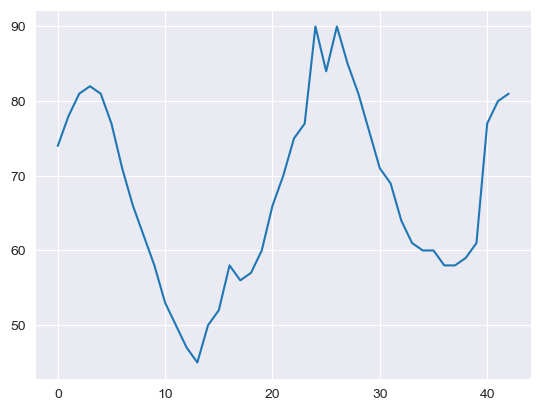

In [10]:
x = 0
y = 0
plt.plot(data[(data['latitude']==y) & (data['longitude']==x)]["hour"], data[(data['latitude']==y) & (data['longitude']==x)]["humidity"])
plt.show()

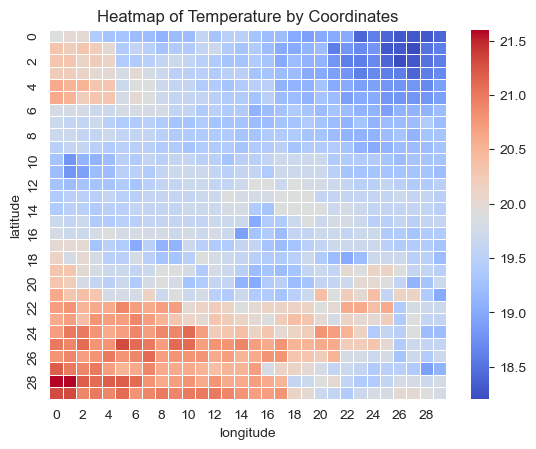

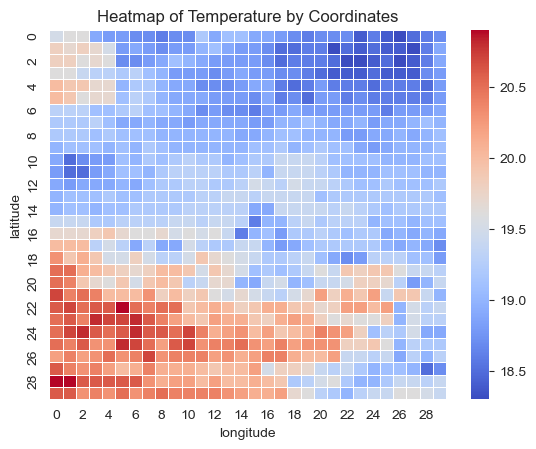

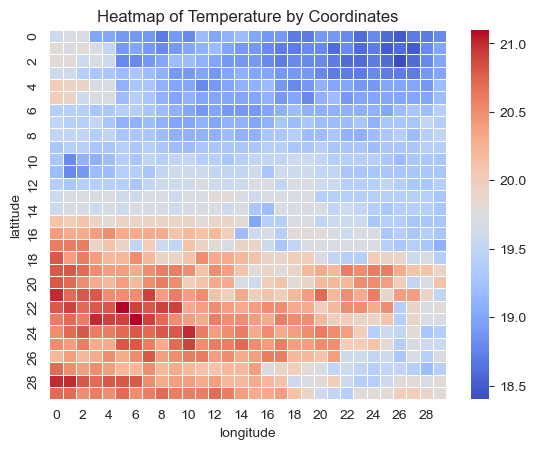

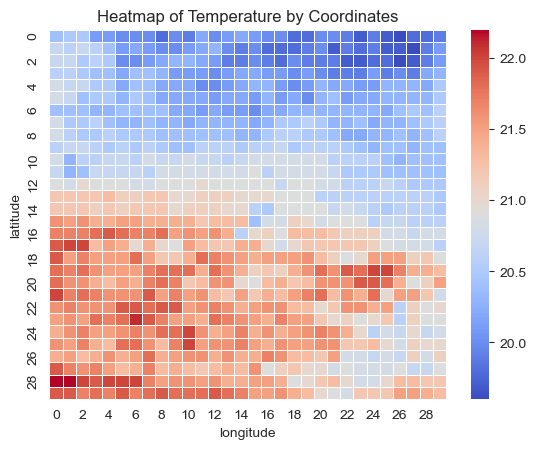

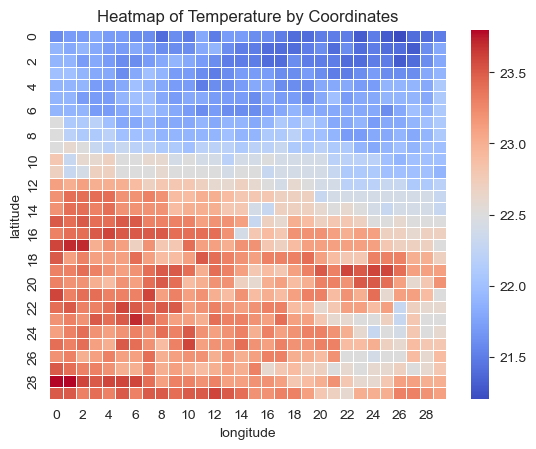

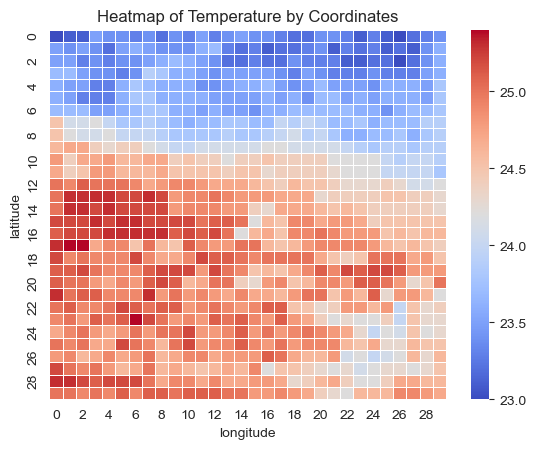

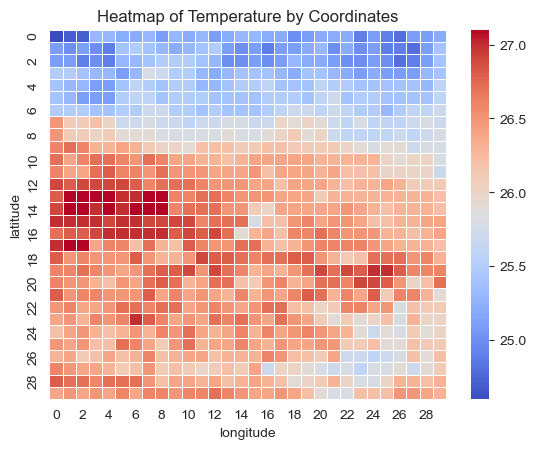

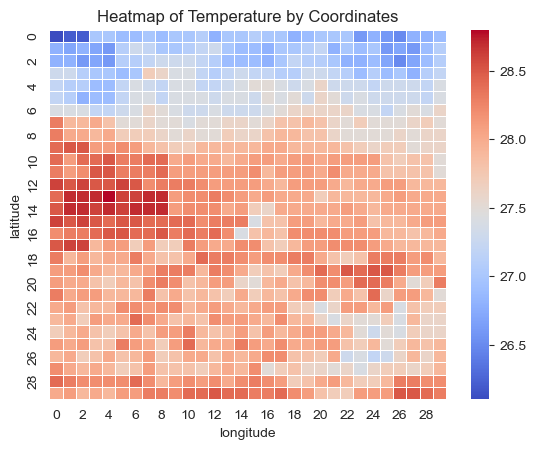

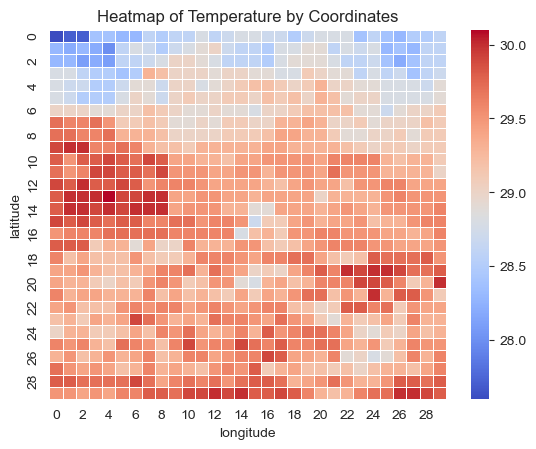

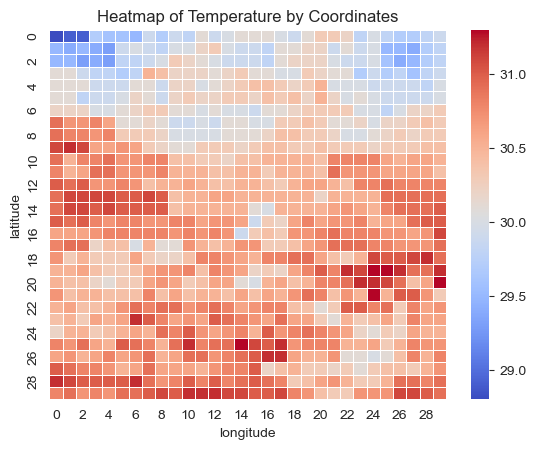

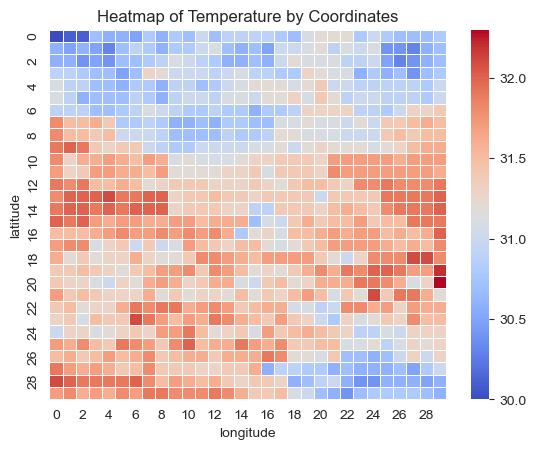

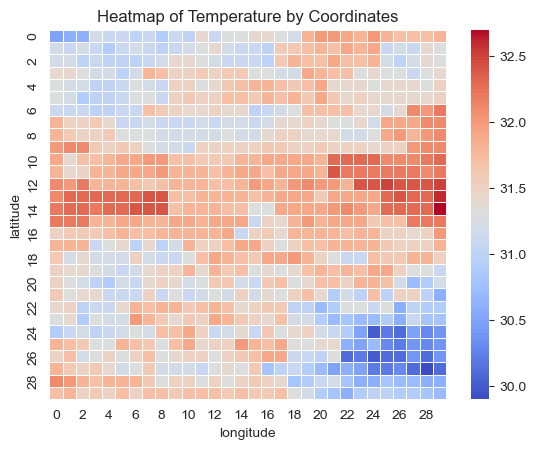

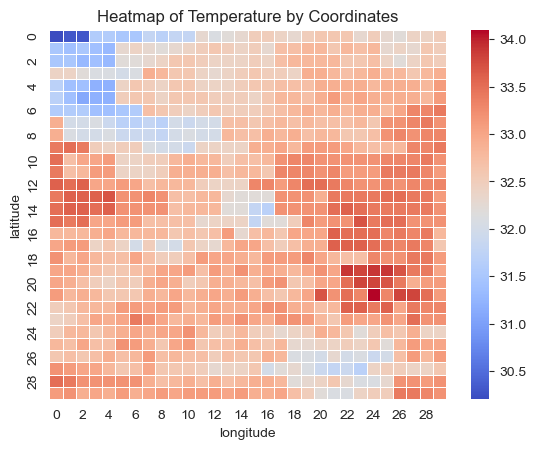

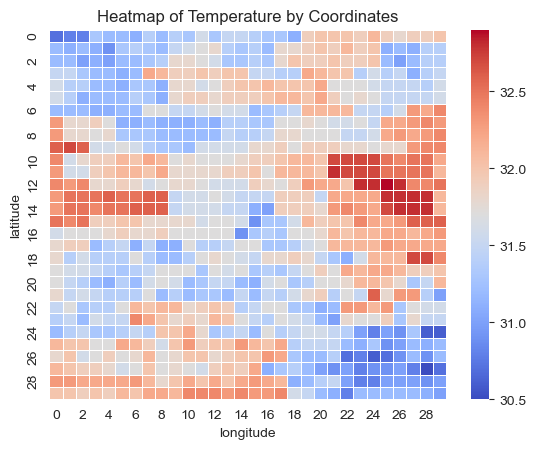

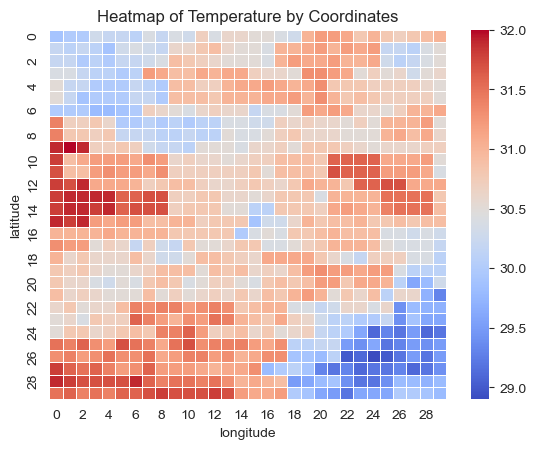

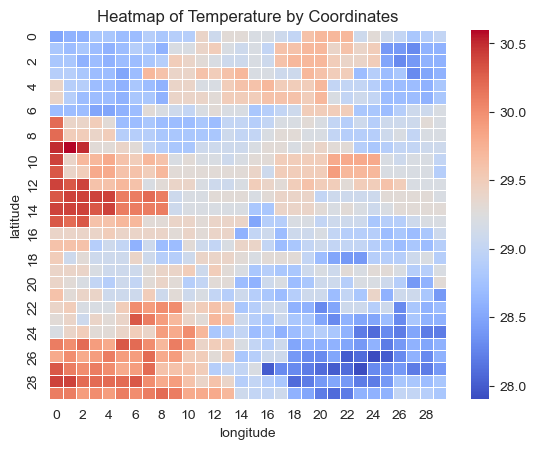

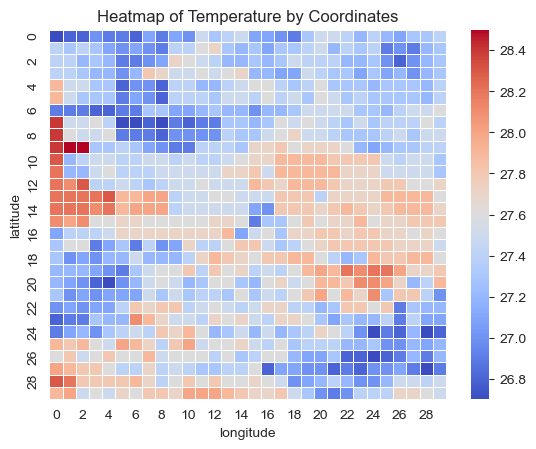

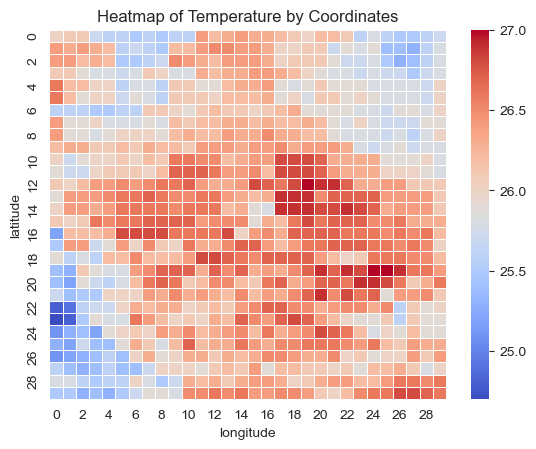

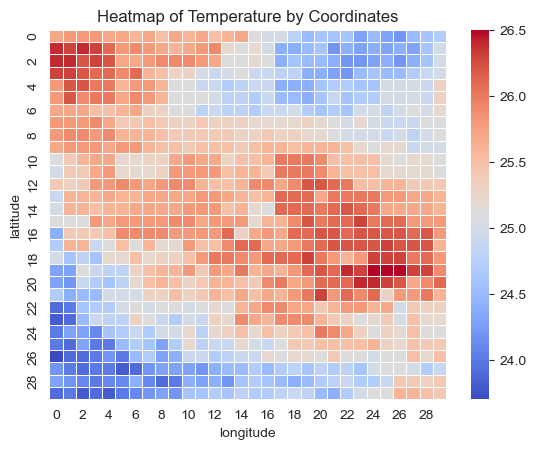

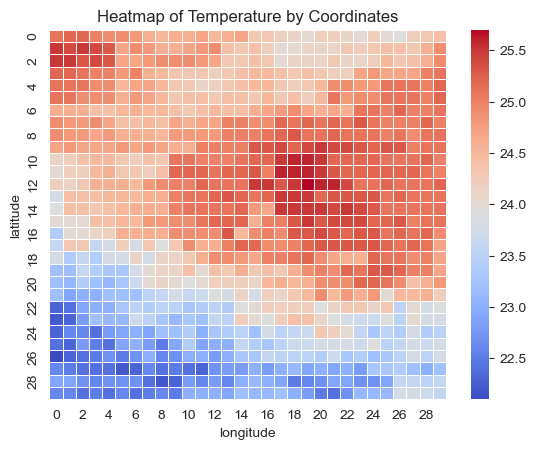

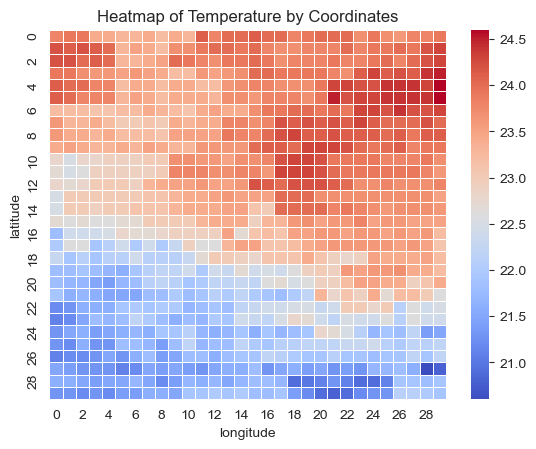

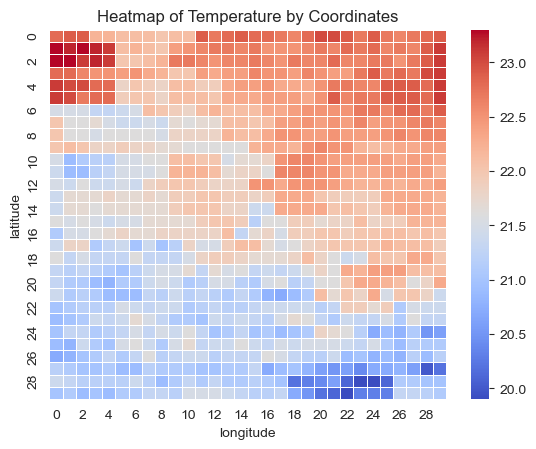

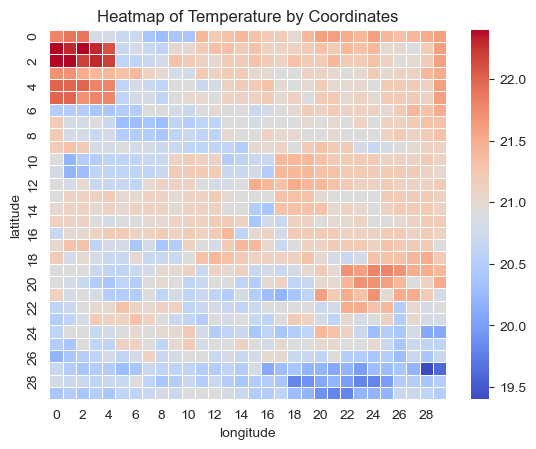

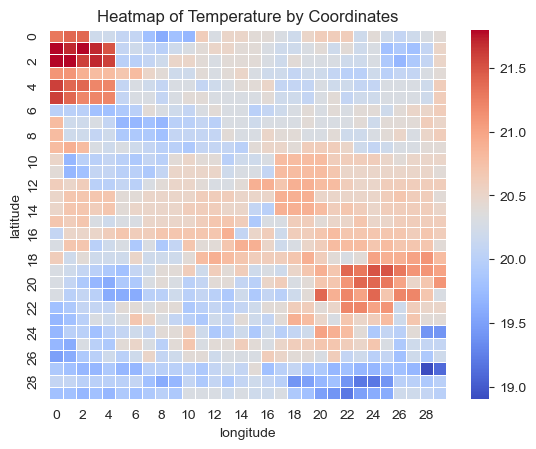

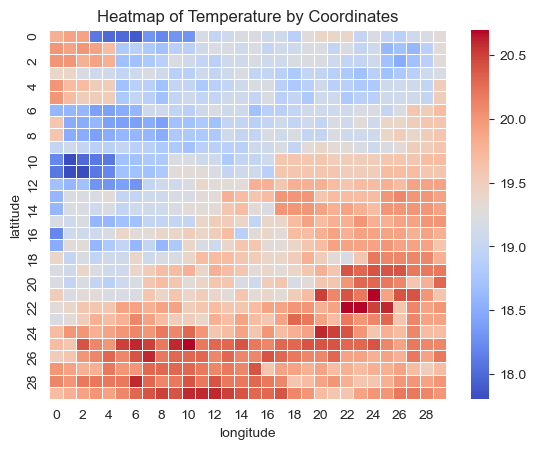

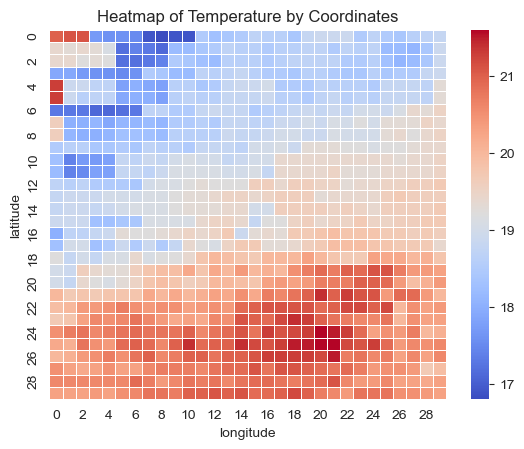

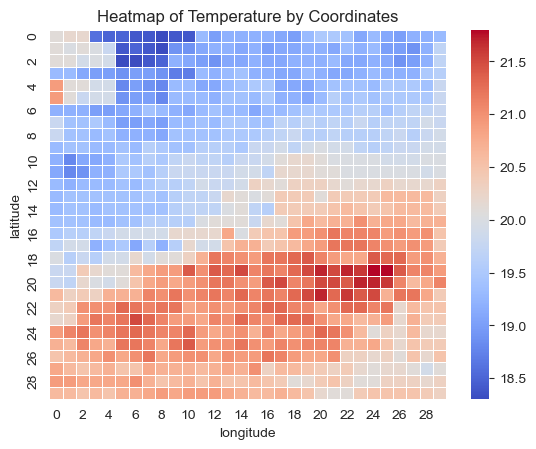

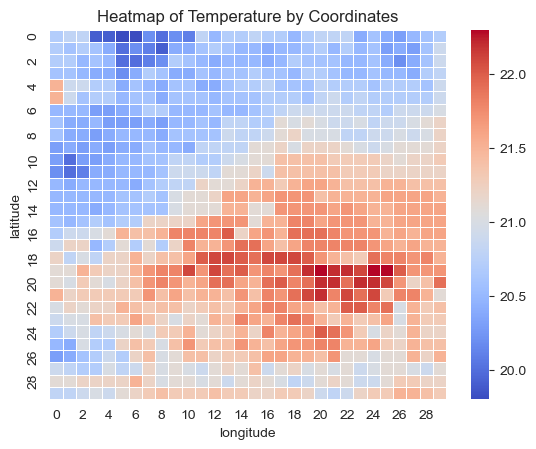

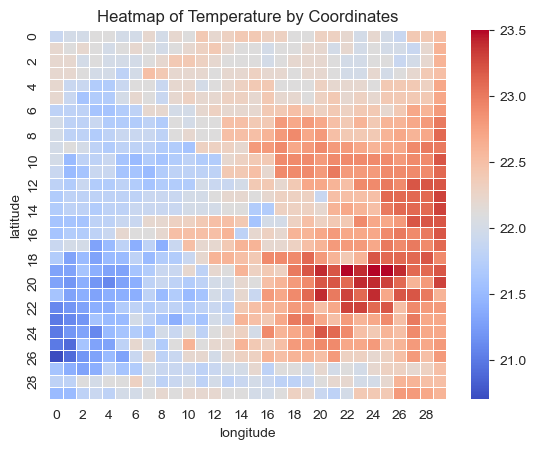

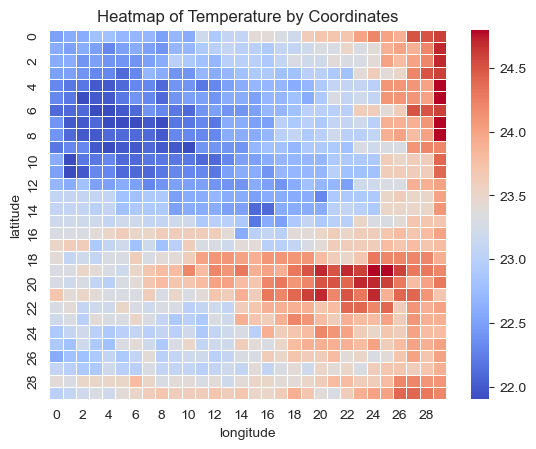

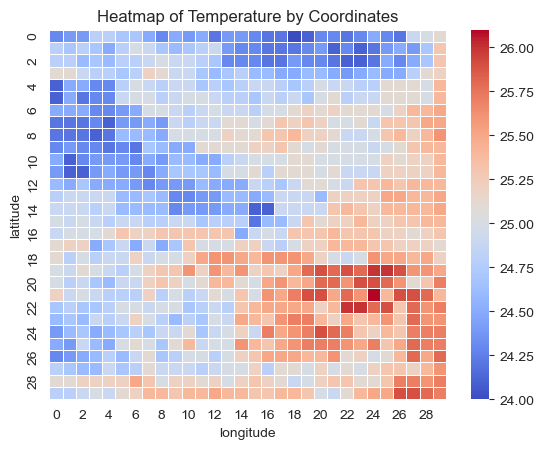

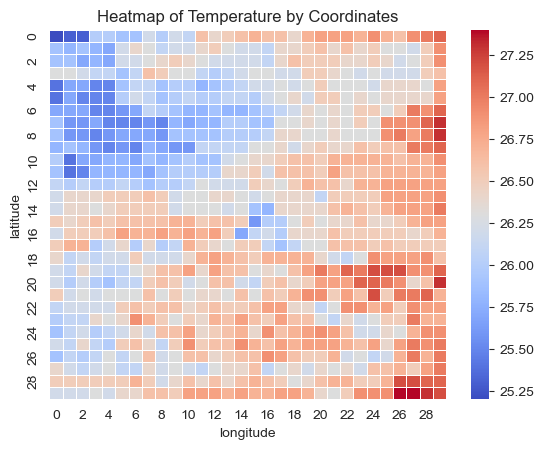

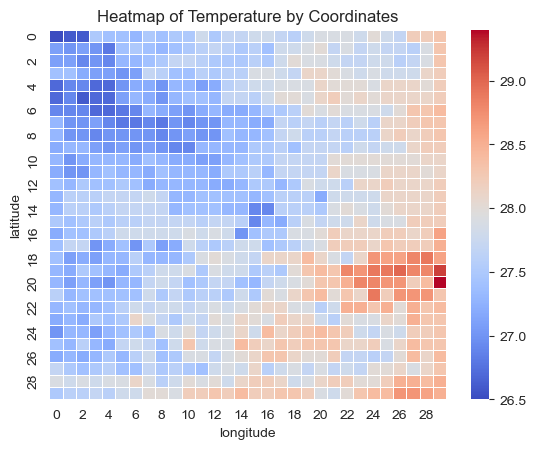

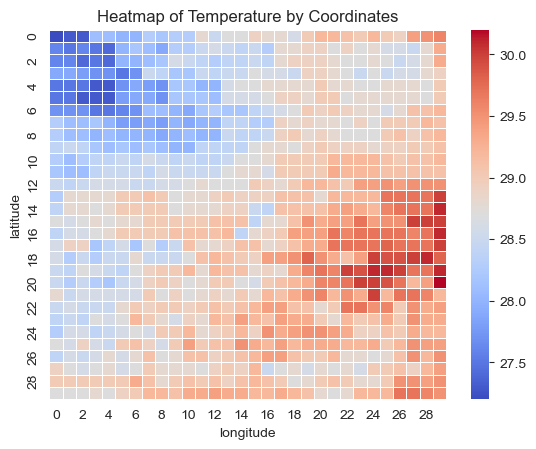

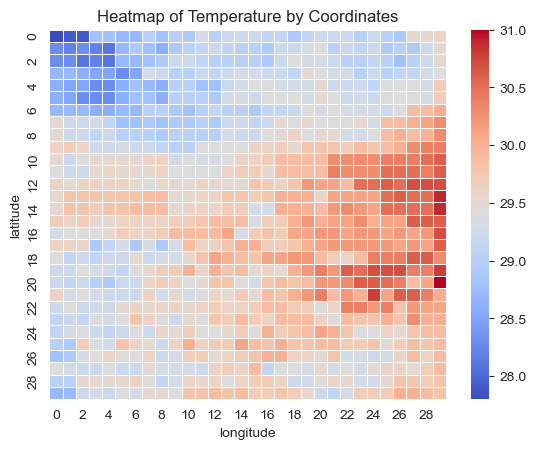

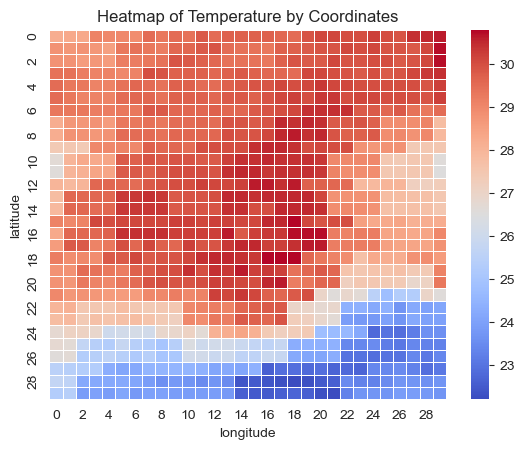

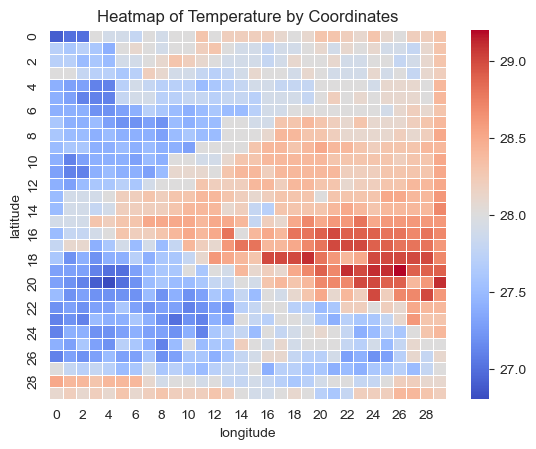

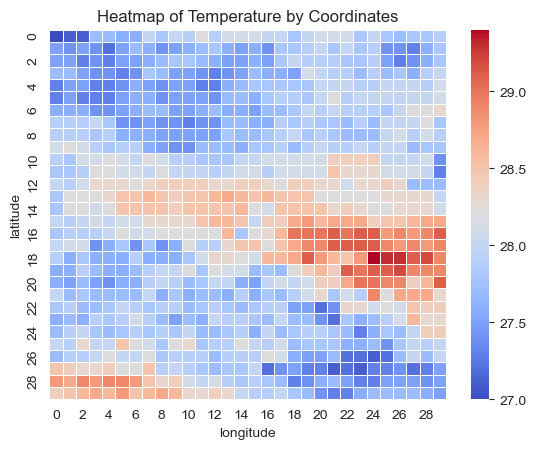

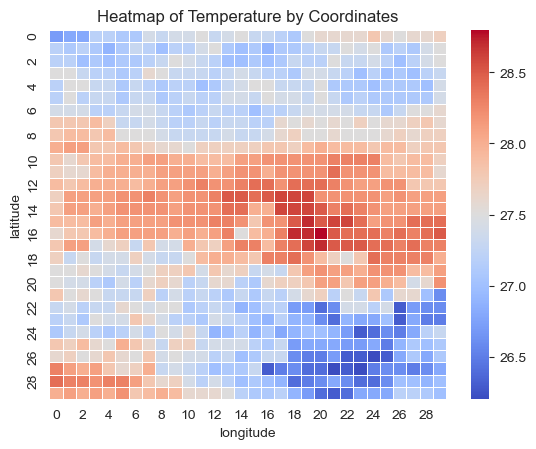

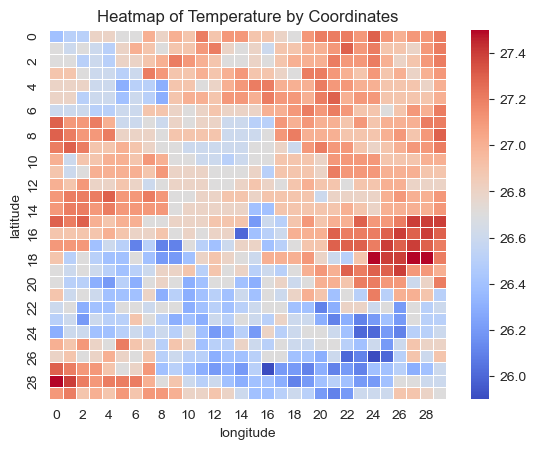

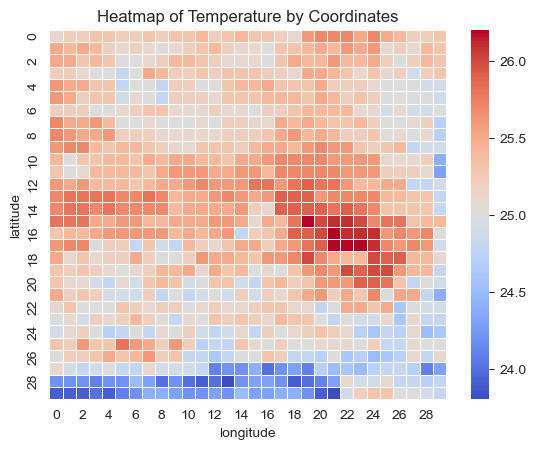

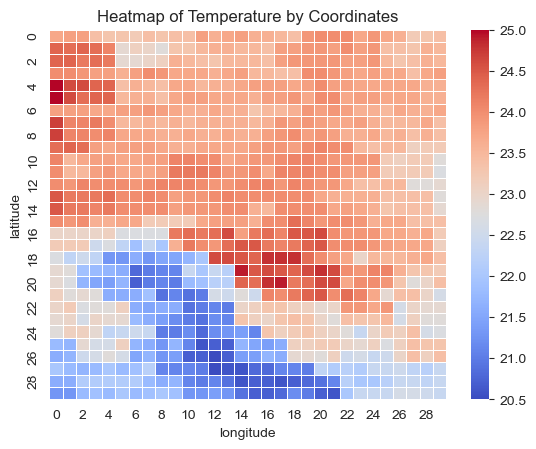

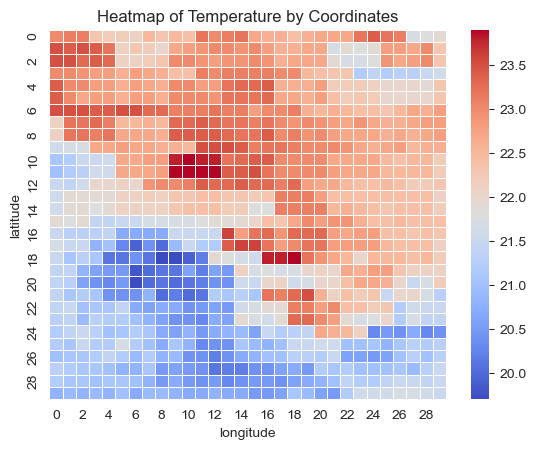

In [11]:
for hour in range(43):
  pivot_df = data[data['hour'] == hour].drop(['hour', 'cloud_cover', 'elevation', 'humidity', 'pressure', 'wind_dir', 'wind_speed'], axis=1).pivot(index='latitude', columns='longitude', values='temperature')
  sns.heatmap(pivot_df, annot=False, cmap='coolwarm', linewidths=.5)
  plt.title('Heatmap of Temperature by Coordinates')
  plt.show()

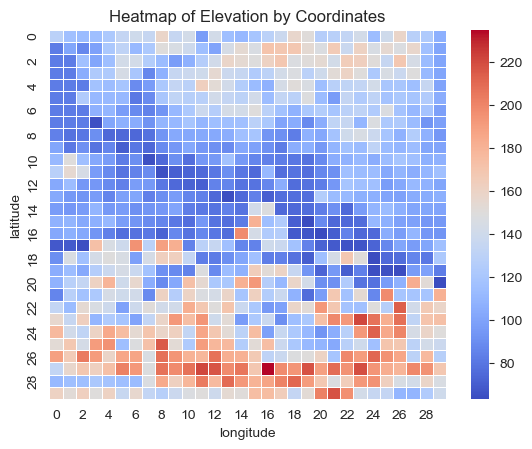

In [12]:
pivot_df = data[data['hour'] == 5].drop(['hour', 'cloud_cover', 'temperature', 'humidity', 'pressure', 'wind_dir', 'wind_speed'], axis=1).pivot(index='latitude', columns='longitude', values='elevation')
sns.heatmap(pivot_df, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Elevation by Coordinates')
plt.show()

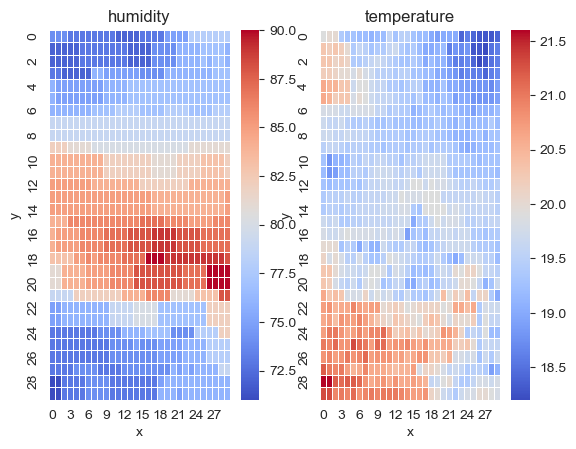

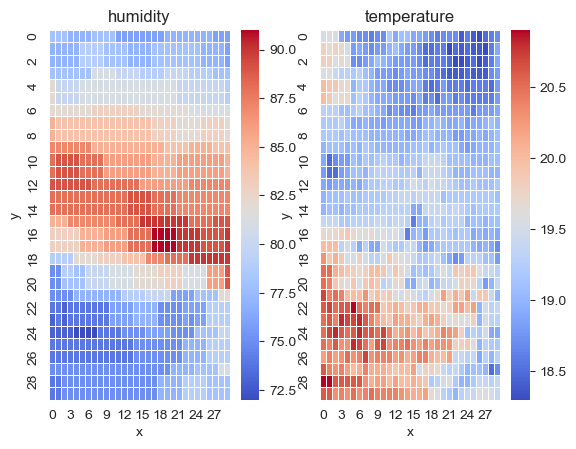

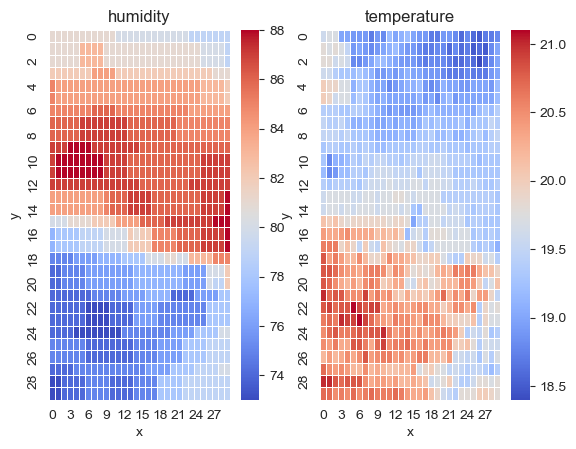

In [25]:
for hour in range(3):
  plt.subplot(1, 2, 1)
  pivot_df = data[data['hour'] == hour].drop(['hour', 'cloud_cover', 'elevation', 'wind_speed', 'pressure', 'wind_dir', 'temperature'], axis=1).pivot(index='latitude', columns='longitude', values='humidity')
  im1 = sns.heatmap(pivot_df, annot=False, cmap='coolwarm', linewidths=.5)
  plt.title('humidity')
  plt.xlabel('x')
  plt.ylabel('y')
  
  plt.subplot(1, 2, 2)
  pivot_df = data[data['hour'] == hour].drop(['hour', 'cloud_cover', 'elevation', 'humidity', 'wind_dir', 'wind_speed', 'pressure'], axis=1).pivot(index='latitude', columns='longitude', values='temperature')
  im2 = sns.heatmap(pivot_df, annot=False, cmap='coolwarm', linewidths=.5)
  plt.title('temperature')
  plt.xlabel('x')
  plt.ylabel('y')
  
  plt.show()

# Model

## etna

In [26]:
!pip install -q etna

In [1]:
import warnings

warnings.filterwarnings(action="ignore", message="Torchmetrics v0.9")

In [2]:
from etna.datasets.tsdataset import TSDataset

C:\Users\zaran\anaconda3\lib\site-packages\etna\settings.py:37: UserWarning: etna[torch] is not available, to install it, run `pip install etna[torch]`
  warnings.warn("etna[torch] is not available, to install it, run `pip install etna[torch]`")
C:\Users\zaran\anaconda3\lib\site-packages\etna\settings.py:45: UserWarning: wandb is not available, to install it, run `pip install etna[wandb]`
  warnings.warn("wandb is not available, to install it, run `pip install etna[wandb]`")
C:\Users\zaran\anaconda3\lib\site-packages\etna\settings.py:53: UserWarning: etna[prophet] is not available, to install it, run `pip install etna[prophet]`
  warnings.warn("etna[prophet] is not available, to install it, run `pip install etna[prophet]`")
C:\Users\zaran\anaconda3\lib\site-packages\etna\settings.py:62: UserWarning: etna[classification] is not available, to install it, run `pip install etna[classification]`
  warnings.warn("etna[classification] is not available, to install it, run `pip install etna[cla

In [3]:
from datetime import datetime

def hour_to_datetime(hour):
    # Получаем текущую дату
    current_date = pd.Timestamp.now().date()

    # Создаем объект Timestamp с заданным часом
    timestamp = pd.Timestamp.combine(current_date, pd.Timestamp.min.time()) + pd.Timedelta(hours=hour)

    return timestamp

In [6]:
import tqdm
dict_weather_etna = {
    "timestamp": [],
    "segment": [],
    "target": []
}
segments = ["cloud_cover", "humidity", "pressure", "temperature", "wind_dir", "wind_speed"]
for segment in segments:
  for hour in tqdm.tqdm(range(43)):
    for y in range(30):
      for x in range(30):
        dict_weather_etna["timestamp"].append(hour_to_datetime(hour))

        dict_weather_etna["target"].append(np.load(f"data/{segment}.npy")[hour][y][x])
        dict_weather_etna["segment"].append(f"{x}_{y}_{segment}")

100%|██████████| 43/43 [00:14<00:00,  2.94it/s]


In [7]:
len(dict_weather_etna["timestamp"])

232200

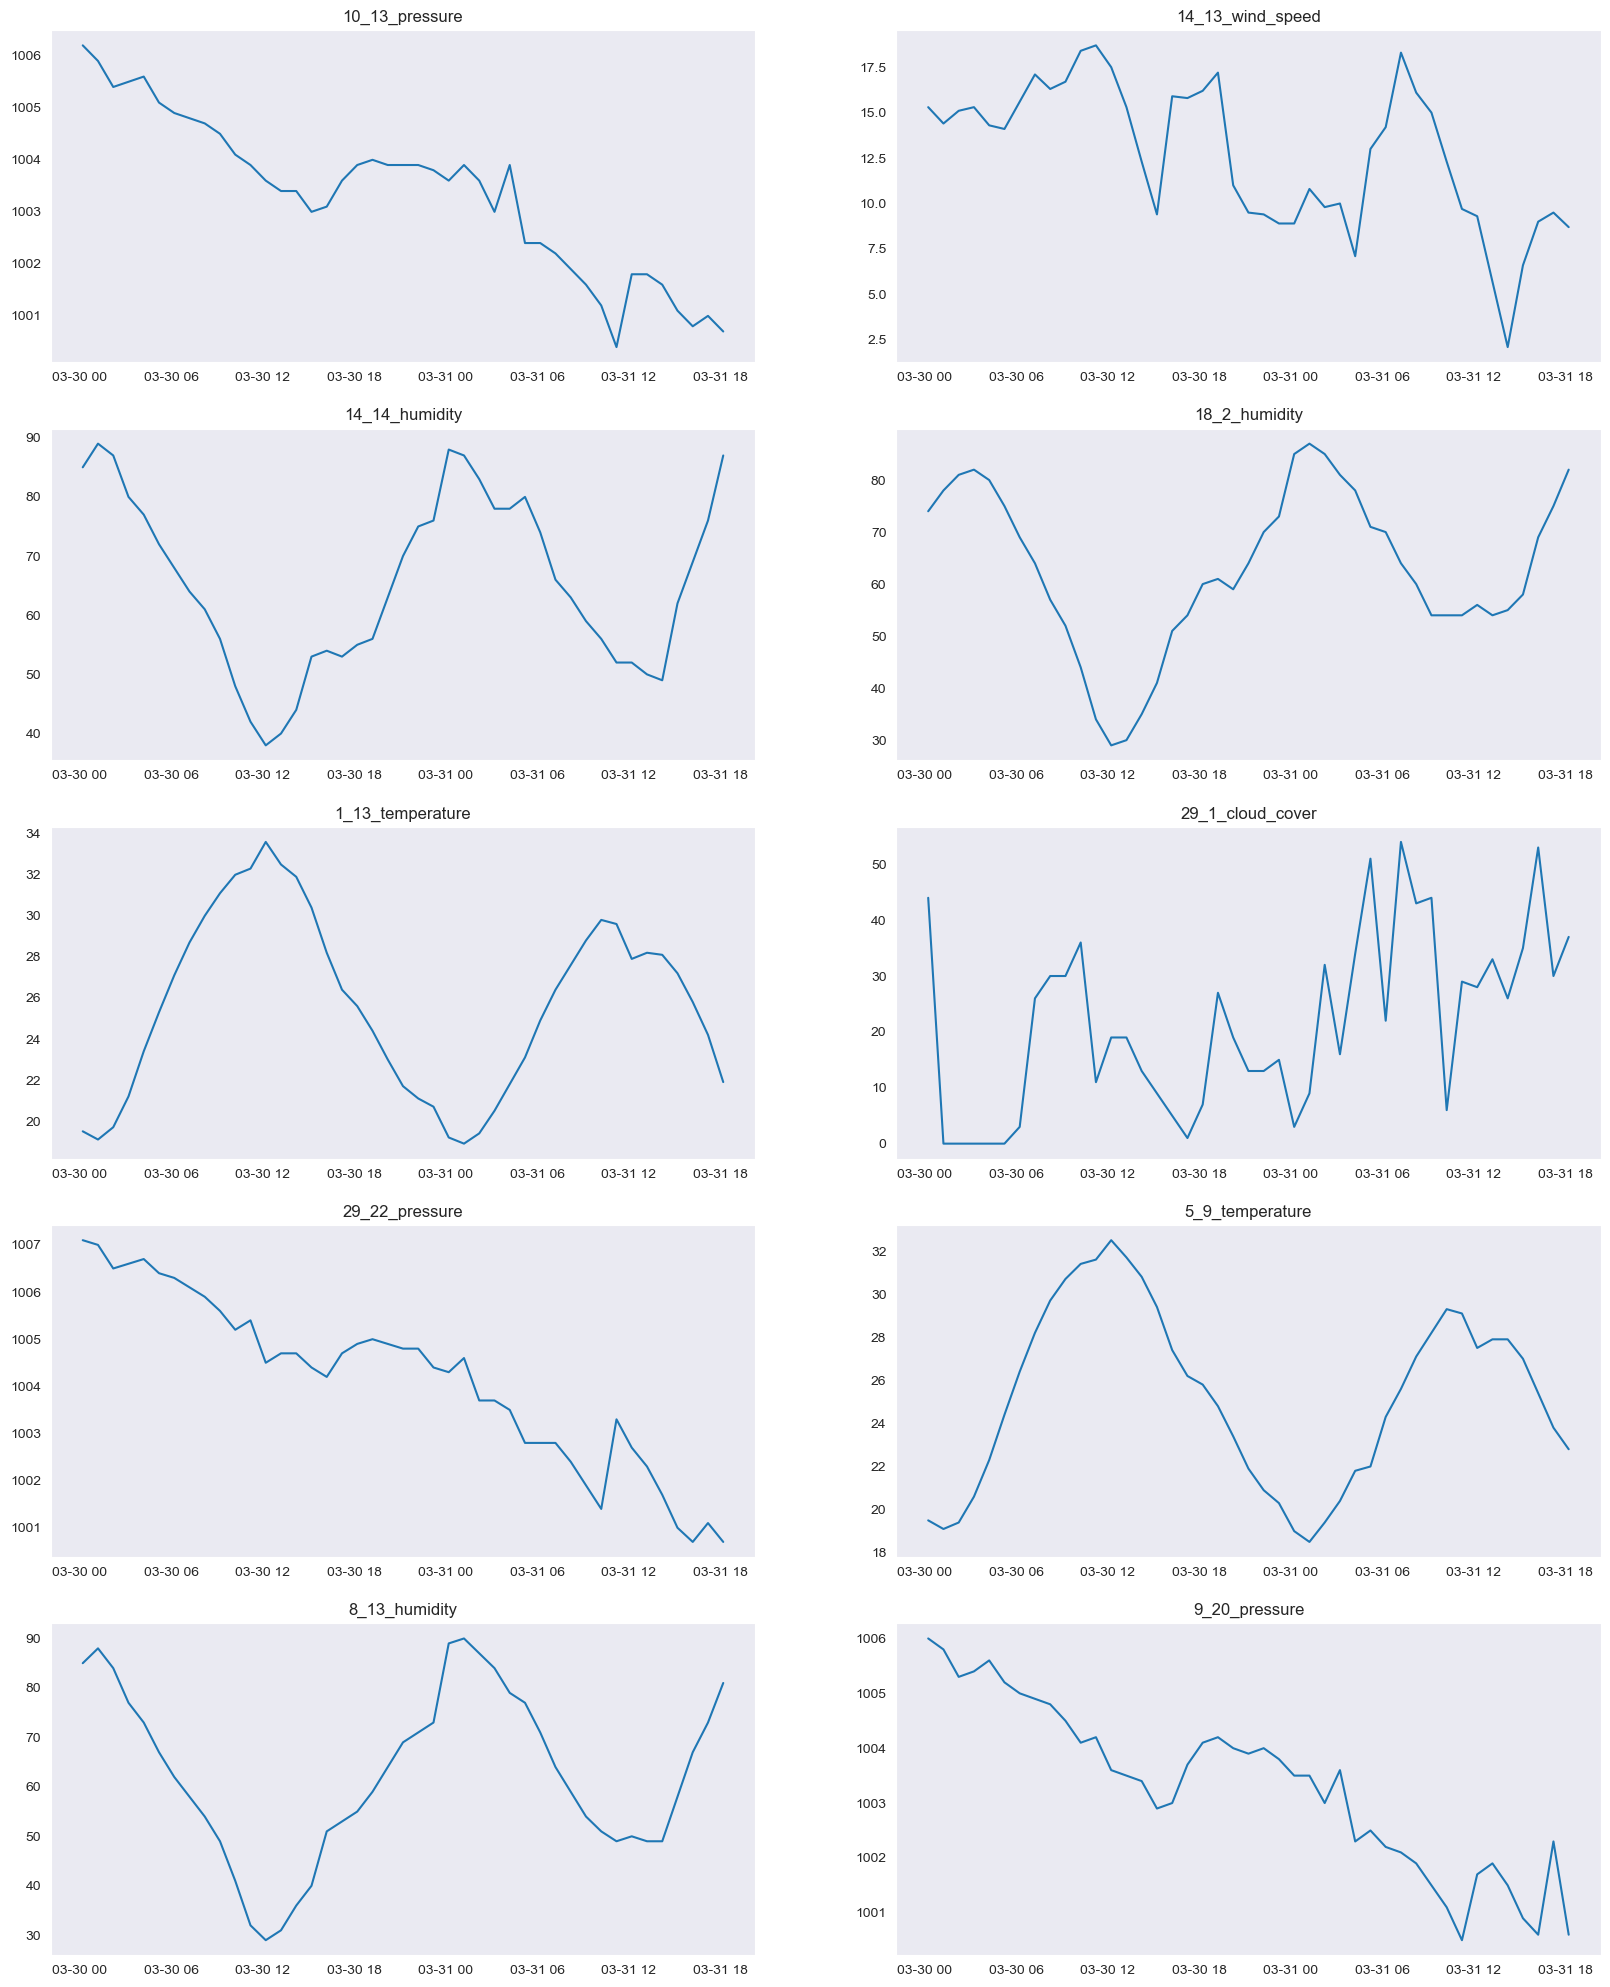

In [8]:
etna_data = pd.DataFrame(dict_weather_etna)
df = TSDataset.to_dataset(etna_data)
ts = TSDataset(df, freq="H")
ts.plot()

In [22]:
ts.info()

<class 'etna.datasets.TSDataset'>
num_segments: 5400
num_exogs: 0
num_regressors: 0
num_known_future: 0
freq: h
                             start_timestamp              end_timestamp  length  num_missing
segments                                                                                    
0_0_cloud_cover   2024-03-30 00:12:43.145224 2024-03-31 18:12:43.145224      43            0
0_0_humidity      2024-03-30 00:12:43.145224 2024-03-31 18:12:43.145224      43            0
0_0_pressure      2024-03-30 00:12:43.145224 2024-03-31 18:12:43.145224      43            0
0_0_temperature   2024-03-30 00:12:43.145224 2024-03-31 18:12:43.145224      43            0
0_0_wind_dir      2024-03-30 00:12:43.145224 2024-03-31 18:12:43.145224      43            0
0_0_wind_speed    2024-03-30 00:12:43.145224 2024-03-31 18:12:43.145224      43            0
0_10_cloud_cover  2024-03-30 00:12:43.145224 2024-03-31 18:12:43.145224      43            0
0_10_humidity     2024-03-30 00:12:43.145224 2024-0

In [9]:
HORIZON = 5
train_ts, test_ts = ts.train_test_split(test_size=HORIZON)

In [12]:
from etna.transforms import MeanTransform, LagTransform
from etna.models import CatBoostMultiSegmentModel
from etna.pipeline import Pipeline
from etna.metrics import SMAPE

pipe = Pipeline(
    transforms=[
        LagTransform(in_column="target", lags=list(range(5, 25, 1)))
    ],
    model=CatBoostMultiSegmentModel(),
    horizon=HORIZON
)

metrics, forecast, _ = pipe.backtest(
    ts=ts, metrics=[SMAPE()], n_folds=3)

metrics["SMAPE"].mean()

metrics

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   35.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   35.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\zaran\anaconda3\lib\site-packages\etna\datasets\tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.7s remaining:    0.0s
C:\Users\zaran\anaconda3\lib\site-packages\etna\datasets\tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.8s remaining:    0.0s
C:\Users\z

,segment,SMAPE,fold_number
0,0_0_cloud_cover,43.406093,0
0,0_0_cloud_cover,69.341152,1
0,0_0_cloud_cover,18.328537,2
1,0_0_humidity,17.314950,0
1,0_0_humidity,15.684547,1
...,...,...,...
5398,9_9_wind_dir,17.697125,1
5398,9_9_wind_dir,57.635591,2
5399,9_9_wind_speed,18.288292,0
5399,9_9_wind_speed,36.473223,1


In [13]:
from etna.analysis import plot_backtest
plot_backtest(forecast, ts, history_len=10)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000020C8DA74F70> (for post_execute):


ValueError: Image size of 2000x1350000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 2000x1350000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2000x1.35e+06 with 5400 Axes>

# Inference

In [14]:
pipe = Pipeline(
    transforms=[
        MeanTransform(in_column="target", window=1),
        LagTransform(in_column="target", lags=list(range(HORIZON, 10, 1)))
    ],
    model=CatBoostMultiSegmentModel(),
    horizon=HORIZON
)

pipe.fit(ts)

Pipeline(model = CatBoostMultiSegmentModel(iterations = None, depth = None, learning_rate = None, logging_level = 'Silent', l2_leaf_reg = None, thread_count = None, ), transforms = [MeanTransform(in_column = 'target', window = 1, seasonality = 1, alpha = 1, min_periods = 1, fillna = 0, out_column = None, ), LagTransform(in_column = 'target', lags = [5, 6, 7, 8, 9], out_column = None, )], horizon = 5, )

In [15]:
forecasts = pipe.forecast()

C:\Users\zaran\anaconda3\lib\site-packages\etna\datasets\tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(


## submit

In [ ]:
submit = {"temperature": [],
          "pressure": [],
          "humidity": [],
          "wind_speed": [],
          "wind_dir": [],
          "cloud_cover": []}

for i in range(5):
  for segment in segments:
    for y in range(30):
      for x in range(30):
        submit[f"{segment}"].append(forecasts.to_pandas()[f"{x}_{y}_{segment}"]['target'].tolist()[i])

In [70]:
pd.DataFrame(submit).to_csv("submission_.csv", index_label="ID")